![GettingStarted](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_GettingStarted.png)


#[Step 1] **READ**: COVID-19 Detection with Convolutional Neural Network (CNN)

The COVID-19 pandemic has posted huge pressure to hospital operation. As the infection rate increase overtime, hospitals are almost running out of capacity. Early detection and treatment has become very important to "flatten the curve".

However, we are facing some challenges at the early covid stagessuch as
- small data sample to support our analysis
- lack awareness of the disease



<br>

**1. At the early stage of the pandemic, how can we leverage AI to identify covid-19 cases?**

<br>

**2. What do you think the small data sample would impact our CNN model performance?**
 <br>


<br>

##  AI-Driven Solution: Image Recognition using CNN

AI-driven image recognition technology can be a great help in learning the features from COVID-19 X-Ray images, detect the abnormalities and provide proper assistance in the diagnosis process. With this AI tutorial, you will learn how to use CNN to predict whether the patient has COVID-19 based on their X-Ray lung images.

**At the end of this AI tutorial, you can build a convolutional neural network model that uses X-ray images to predict whether a patient has COVID-19 or not.** Based on this model, you could apply similar methodology to detect other decisese. For example, using MRI image to detect brain tumor, use X-Ray images to detect bone fracture and use skin image to detect skin cancer etc.

<br>

---

#[Step 2] **RUN**: Setting Up the Colab Environment

Colab allows us to work with our data interactively in an online environment, and we need only a few steps needed in order to set up the environment including importing packages and loading the data.

<br>

**Run the code in this section to complete the set-up.**

<br>

**Import Packages**

Python packages enable different functions, providing easy ways of manipulating data and building models. As a first step, we 'import' packages to set up our environment in a way that allows us to take advantage of different capabilities.

In this section, we will import keras from tensorflow to implement this model

In [3]:

# Import Required Packages
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# Instead of 'from keras.preprocessing.image import ImageDataGenerator'
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tf.keras for ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
# Instead of 'from tensorflow.keras.preprocessing.image import ImageDataGenerator'
#from tensorflow.keras.preprocessing.image import ImageDataGenerator # No need to import again
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [4]:
# Setting Random Seed to Control Random Start Value for Easier Model Performance Comparison
seed_value = 100

################### also add this one to make sure the consistent.
tf.random.set_seed(seed_value)
###################


tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

<br>

**Loading Dataset**

The following code blocks allow us to access data hosted on Kaggle and import it for analysis within the Colab environment. And we will temporarily store them in our google drive. We will create two folders for training and testing dataset and within each folder, we will have two subfolders to store COVID-19 lung images and normal lung images separately.

In [5]:
#Downloading Cleaned Data from Kaggle
os.environ['KAGGLE_USERNAME'] = "chidsatumd"
os.environ['KAGGLE_KEY'] = "bf7b15e0be2350ad3fb648b369084090"

!kaggle datasets download -d chidsatumd/sample-covid-data

zsh:1: command not found: kaggle


In [6]:
#Unzipping dataset and saving it to the Google Drive Working Directory
!unzip -o -q /content/sample-covid-data.zip -d /content/


unzip:  cannot find or open /content/sample-covid-data.zip, /content/sample-covid-data.zip.zip or /content/sample-covid-data.zip.ZIP.


In [7]:
#set the path to the main dir
main_dir = "/content/Sample Covid Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, "train")

#set the path to the test dir
test_dir = os.path.join(main_dir, "test")

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, "COVID19")

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, "NORMAL")

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, "COVID19")

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [8]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:5])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:5])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:5])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:5])

FileNotFoundError: [Errno 2] No such file or directory: '/content/Sample Covid Data/train/COVID19'

In [ ]:
#print the total number of covid vs normal images in training set
print("Total images present in the training set：", len(train_covid_names+train_normal_names))
print("  COVID images present in the training set：", len(train_covid_names))
print("  NORMAL images present in the training set：", len(train_normal_names))

#print the total number of covid vs normal images in testing set
print("Total images present in the testing set：", len(test_covid_names+test_normal_names))
print("  COVID images present in the testing set：", len(test_covid_names))
print("  NORMAL images present in the testing set：", len(test_normal_names))

Total images present in the training set： 200
  COVID images present in the training set： 100
  NORMAL images present in the training set： 100
Total images present in the testing set： 60
  COVID images present in the testing set： 30
  NORMAL images present in the testing set： 30



---
![Review](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Review.png)

# [Step 3] **REVIEW**: Visualize the Data

<br>
We will visualize the training data here to have a quick preview of the main difference between helathy lungs and COVID-19 infected lungs. This is also a quick check for input data quality.

['/content/Sample Covid Data/train/COVID19/COVID19(57).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(17).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(101).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(60).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(26).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(22).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(2).jpg', '/content/Sample Covid Data/train/COVID19/COVID19(94).jpg']
['/content/Sample Covid Data/train/NORMAL/NORMAL94.png', '/content/Sample Covid Data/train/NORMAL/NORMAL(59).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(29).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(54).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(16).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(66).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(1).jpg', '/content/Sample Covid Data/train/NORMAL/NORMAL(82).jpg']


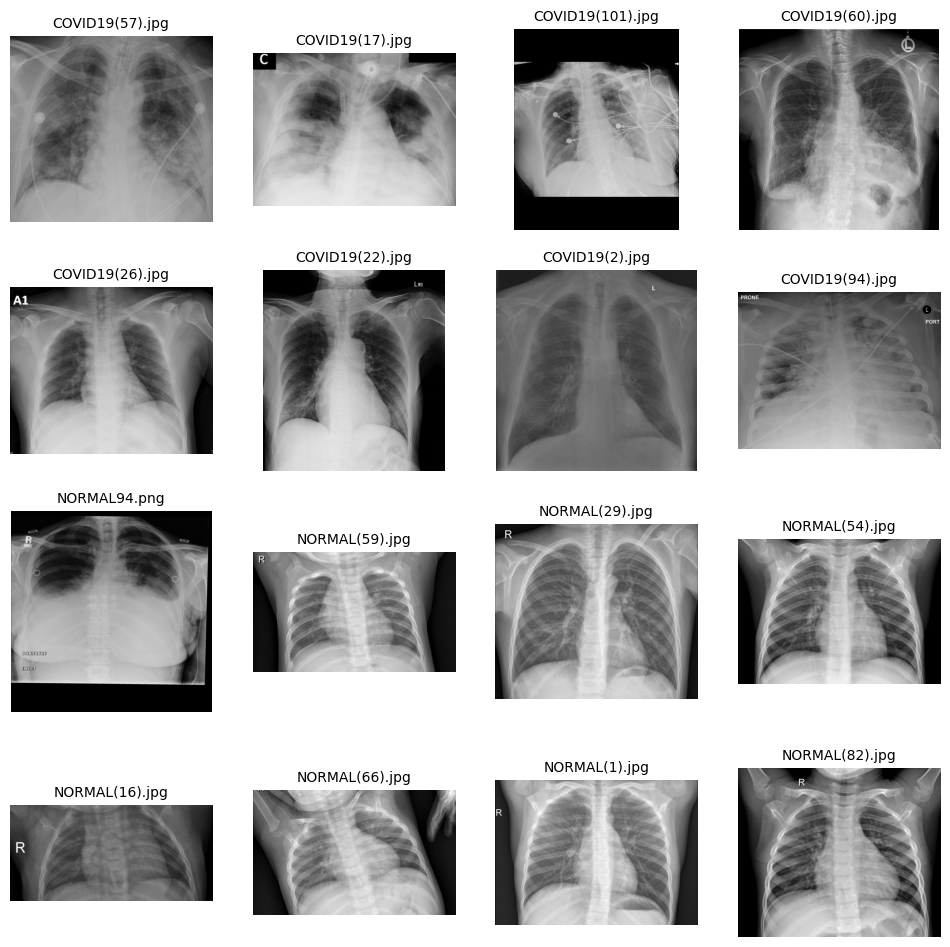

In [ ]:
# Visualize a subset of our training data
# Plott8 Covid19 images and 8 images of Normal images for comparison
import matplotlib.image as mpimg
# set the number of columns and rows
rows = 4
cols = 4
# set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

# create 2 lists to store the images(one for covid images, one for normal images) in the training set
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

# print the covid image filenames
print(covid_pic)
# print the normal image filenames
print(normal_pic)
# merge the covid and normal list into one list
merged_list = covid_pic+normal_pic

#Show the images in a grid
for i, img_path in enumerate(merged_list):
  data = img_path.split("/",6)[5]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

#[Step 4] **Data Preprocessing & Augmentation**
<br>
In this section, we will process the images by using rescaling and reshaping

In [ ]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2)

# rescale the validation and testing images
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

# configure the training image generator by resizing them to 150*150 px
# give it a subset name called training
# specify batch size
# It is binary (covid vs normal)
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# we do the same to the validation image generator
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# we do the same to the testing image generator
test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',

                                                 #########
                                                 shuffle = False,
                                                 #########
                                               )

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
# dgen_test.flow_from_directory?

In [ ]:
# get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
# get the training image shape
# it shows as 150 * 150 px as we scaled it
train_generator.image_shape

(150, 150, 3)

#[Step 5] **Build the CNN model**
- Convolutional layers
- Max pooling layers
- Dropout layers
- Fully connected feedforward neural network layer

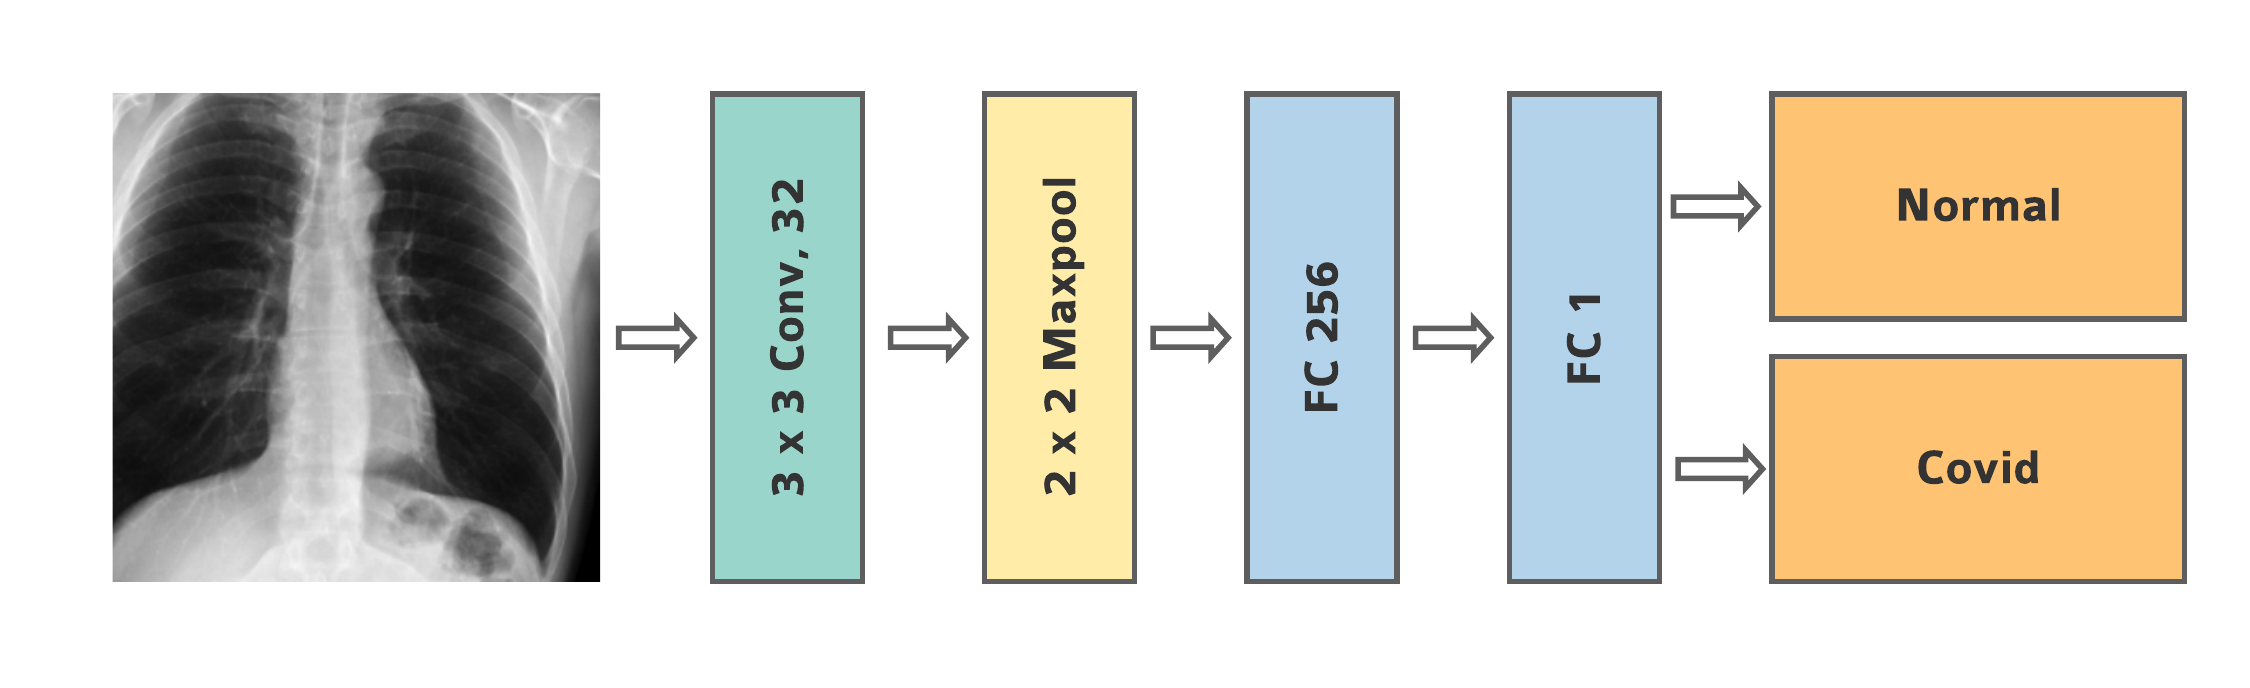

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(3,3),padding="SAME",activation="relu",input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer (prevent overfitting)
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# print out the model structure summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 256)               46080256  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
#compile the model
#specify activation function, learning rate and loss function
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#[Step 6] Train the model

In [ ]:
#train the model using 10 epochs
history = model.fit(train_generator, epochs = 5, validation_data = validation_generator)

Epoch 1/5
5/5 [==============================] - 15s 1s/step - loss: 16.2261 - accuracy: 0.5250 - val_loss: 18.0120 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 4s 892ms/step - loss: 6.3398 - accuracy: 0.6500 - val_loss: 5.2869 - val_accuracy: 0.5250
Epoch 3/5
5/5 [==============================] - 4s 786ms/step - loss: 4.3477 - accuracy: 0.6687 - val_loss: 3.9525 - val_accuracy: 0.6000
Epoch 4/5
5/5 [==============================] - 5s 936ms/step - loss: 1.8644 - accuracy: 0.7437 - val_loss: 1.2863 - val_accuracy: 0.7750
Epoch 5/5
5/5 [==============================] - 4s 805ms/step - loss: 1.5644 - accuracy: 0.7563 - val_loss: 0.6745 - val_accuracy: 0.8250


After each epoch, how does the loss change?

Text(0.5, 0, 'epoch')

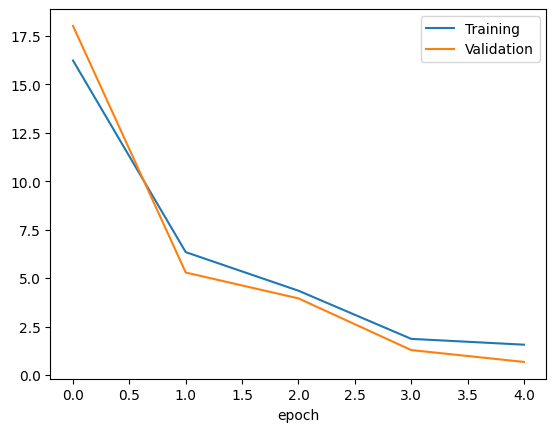

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.xlabel('epoch')

After each epoch, how does the accuracy change?

Text(0.5, 0, 'epoch')

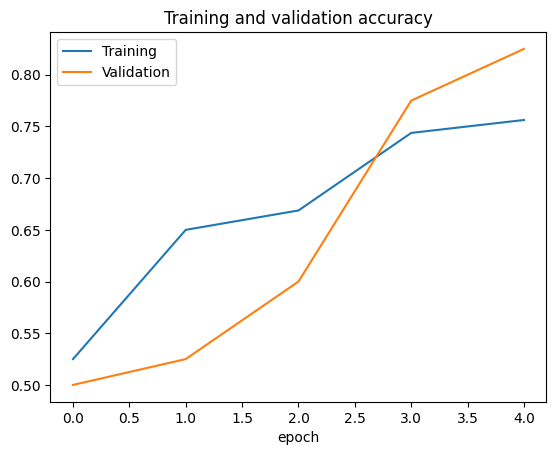

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

#[Step 7] Evaluate the model performance

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

2/2 [==============================] - 1s 393ms/step - loss: 1.0529 - accuracy: 0.7167
test loss:1.0529160499572754 test acc:0.7166666388511658


In [ ]:
len(test_generator)

2

In [ ]:
test_generator.samples

60

## Confusion matrix

In [ ]:
test_generator

In [ ]:
# model.predict??

In [ ]:
#Make predictions on the test dataset using the test generator:
y_pred = model.predict(test_generator)
y_pred = y_pred[:, 0]
y_pred

2/2 [==============================] - 1s 471ms/step


array([2.23237291e-01, 7.68197179e-01, 9.58173335e-01, 8.88985669e-05,
       2.97608245e-02, 3.78398137e-04, 5.20265079e-04, 5.08202286e-03,
       8.39210302e-03, 4.86582611e-03, 3.40598673e-01, 7.78197706e-01,
       9.80032504e-01, 1.95617974e-03, 5.63452952e-04, 4.28107851e-05,
       6.98772252e-01, 3.39048356e-01, 9.75951672e-01, 8.54711107e-05,
       2.46417567e-01, 1.57247502e-02, 9.18376073e-03, 9.57738340e-01,
       1.53048597e-02, 1.20889107e-02, 2.53855344e-02, 1.60780158e-02,
       9.53534126e-01, 1.88296124e-01, 9.99982834e-01, 9.99999881e-01,
       9.99995470e-01, 9.99999642e-01, 9.99984145e-01, 9.99999762e-01,
       9.99998808e-01, 9.99997497e-01, 9.99999046e-01, 9.99999881e-01,
       9.99920130e-01, 9.95780110e-01, 7.72535503e-02, 5.39172649e-01,
       9.95539129e-04, 9.18808162e-01, 3.42114836e-01, 1.04381004e-02,
       5.57528620e-05, 9.91514206e-01, 1.58947997e-03, 9.73488271e-01,
       4.36355144e-01, 9.99167562e-01, 9.10059869e-01, 9.86346416e-03,
      

In [ ]:
#Make predictions on the test dataset using the test generator:
# y_pred = model.predict(test_generator)

#Convert the predicted probabilities to class labels:
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

In [ ]:
#Get the true class labels from the test generator:
y_test_classes = test_generator.classes
#y_test_classes

In [ ]:
# confirm accuracy
(y_pred_classes == y_test_classes).mean()

0.7166666666666667

In [ ]:

cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[22  8]
 [ 9 21]]


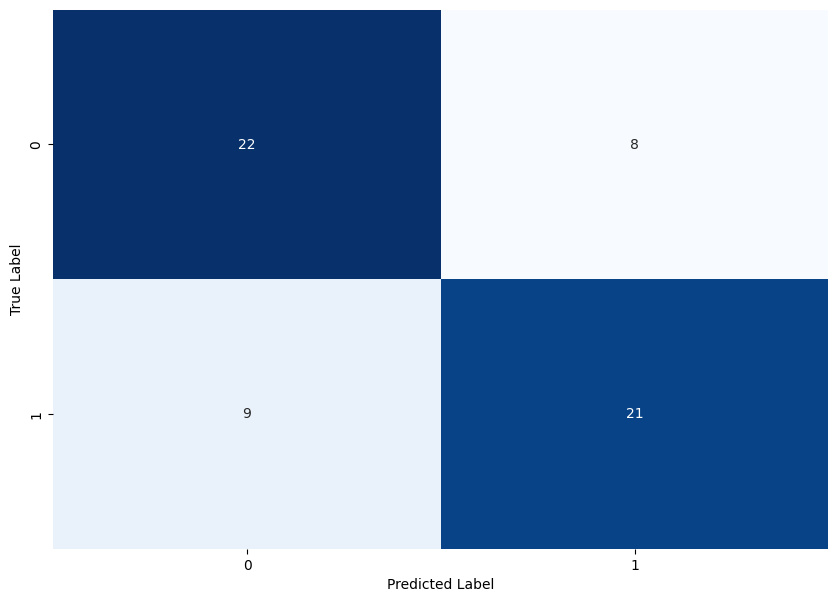

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Precise and Recall

In [ ]:
# part 1: one line solution
from sklearn.metrics import classification_report

y_true = y_test_classes
y_pred = y_pred_classes

print(y_test_classes, '<---- y_test_classes')
print(y_pred_classes, '<---- y_pred_classes')

report = classification_report(y_true, y_pred)

# we should focus on the label 1.
print(report)
# for label 1: precision: 0.79, recall: 0.50, f1-score: 0.61

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] <---- y_test_classes
[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0] <---- y_pred_classes
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        30
           1       0.72      0.70      0.71        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [ ]:
# part 2: understand how Precise and Recall Calculated for Label 1 (COVID-19).

import pandas as pd

df = pd.DataFrame({'y_true': y_test_classes, 'y_pred': y_pred_classes})
df['accuracy'] = df['y_true'] == df['y_pred']

# each row is a sample (patient)
# he/she have
# - y_true (real outcome),
# - y_pred (predict outcome), and
# - accuracy (prediction is correct or not)
print(len(df), '<---- the sample size')
df.head()

60 <---- the sample size


,y_true,y_pred,accuracy
0,0,0,True
1,0,1,False
2,0,1,False
3,0,0,True
4,0,0,True


In [ ]:
# precise:
# we only focus on the samples whose "y_pred" is 1 (COVID-19)
# and then check the accuracy

# generate the selection idx for the samples with y_pred == 1
selection = df['y_pred'] == 1

# select the samples by "df[selection]" and then calcuate their accuracy mean.
precise = df[selection]['accuracy'].mean()
print(precise, '<------- precision')

0.7241379310344828 <------- precision


In [ ]:
# recall:
# we only focus on the samples whose "y_true" is 1 (COVID-19)
# and then check the accuracy

# generate the selection idx for the samples with y_true == 1
selection = df['y_true'] == 1

# select the samples by "df[selection]" and then calcuate their accuracy mean.
recall = df[selection]['accuracy'].mean()
print(recall, '<------- precision')

0.7 <------- precision


![](https://drive.google.com/file/d/1b5gHzVm97Xa14tJ1lmzhUAZUcW1d_cJu/view?usp=sharing)

---
![Learn](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Learn.png)


# [Step 8] **READ**: Takeaway


**1.  When we do not have enough data to train our model, how well do you think our models performed?**


**2. If the model performance is promising, what should you do to make sure the model is picking up the right features?**

**3. If the model performance is not satisfying, what else can we try?**
